In [1]:
from ryPat import *

In [2]:
sm.oo +1 == sm.oo


True

In [46]:
def bell(x):
    y= sm.exp(-x**2)
    return y
def stdnorm(x):
    t= x/sm.sqrt(2)
    y= bell(t)/sm.sqrt(2*π)
    return y


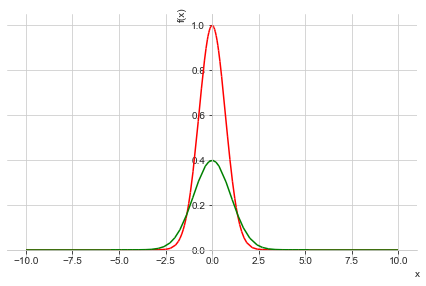

In [47]:
fg= sm.plot(bell(x),    show=False)
fg1= sm.plot(stdnorm(x), show=False)
fg.extend(fg1)
fg[0].line_color='r'
fg[1].line_color='g'
fg.show()

In [48]:
bell(x).integrate((x,-sm.oo, sm.oo))

In [49]:
stdnorm(x).integrate((x,-sm.oo, sm.oo))

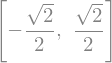

In [52]:
sm.solve(bell(x).diff(x,2))

In [53]:
sm.solve(stdnorm(x).diff(x,2))

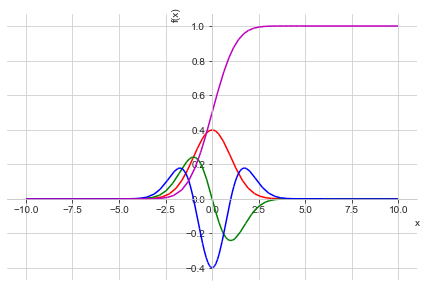

In [324]:
#%matplotlib qt
%matplotlib inline

x= sm.symbols('x')

f= stdnorm(x)

fg=  sm.plot(f,    show=False)
fg1= sm.plot(f.diff(x), show=False)
fg2= sm.plot(f.diff(x,2), show=False)
fg3= sm.plot(f.integrate((x,-sm.oo,x)), show=False)

fg.extend(fg1)
fg.extend(fg2)
fg.extend(fg3)
fg[0].line_color='r'
fg[1].line_color='g'
fg[2].line_color='b'
fg[3].line_color='m'
fg.show()

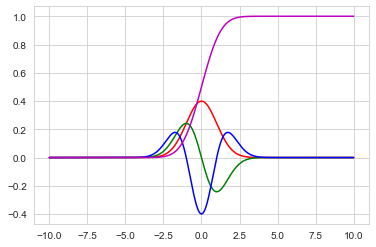

In [325]:
xs=np.linspace(-10,10,1001)


f= stdnorm(x)

ys= sm.lambdify(
    x, f 
    )(xs)

f1= f.diff(x)
ys1= sm.lambdify(
    x, f1 
    )(xs)

f2= f.diff(x,2)
ys2= sm.lambdify(
    x, f2 
    )(xs)

f3= f.integrate((x,-sm.oo, x))
ys3= sm.lambdify(
    x, f3 
    )(xs)

fig, ax= pl.subplots()
ax.plot(xs,ys,  'r', 
        xs,ys1, 'g',
        xs,ys2, 'b',
        xs,ys3, 'm'
       )



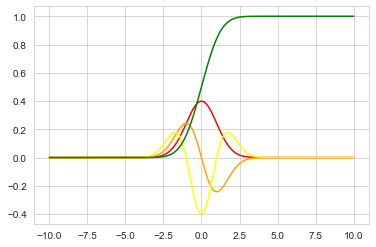

In [326]:
pl.rcParams['axes.prop_cycle']= pl.cycler(
    color=['red', 
           'orange', 
           'yellow', 
           'green',
           'cyan',
           'blue',
           'violet',
           'purple',
           'magenta',
           'gray'])

fig, ax= pl.subplots()
ax.plot(xs,ys,  
        xs,ys1, 
        xs,ys2, 
        xs,ys3, 
       )


In [124]:
#pl.rcParams??

In [131]:
f,g= sm.symbols('f g', cls=sm.Function)
f,g

(f, g)

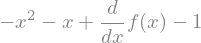

In [134]:
f(x).diff(x) - (x**2+x+1)


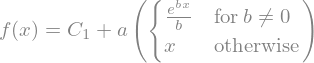

In [136]:
sm.dsolve(
    f(x).diff(x) - (a*sm.exp(b*x)), 
    f(x))

In [157]:
θ, ω= sm.symbols('θ ω', cls= sm.Function)
θ, ω

(θ, ω)

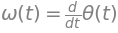

In [139]:
eq= sm.Eq(ω(t), θ(t).diff(t))
eq

In [160]:
sm.Eq(ω(t), a*sm.exp(b*t))

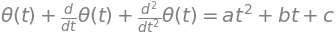

In [185]:
eq= sm.Eq(
    
    θ(t).diff(t,2)
    +θ(t).diff(t)
    +θ(t), 
    
    a*t**2+b*t+c)
eq

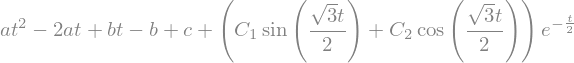

In [186]:
θt= sm.dsolve(
    eq, 
    θ(t)).rhs
θt

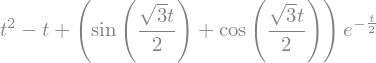

In [187]:
θt1= θt.subs(
{a: 1, b:1, c:1, 'C1':1, 'C2':1}
)
θt1

In [188]:
sm.plot(θt1, (t,-10,10))

# https://www.geeksforgeeks.org/sympy-stats-normal-in-python/#_=_


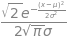

In [218]:
# Import sympy and Normal
from sympy.stats import Normal, density
from sympy import Symbol, pprint
  
x, z, μ= sm.symbols("x, z, μ")
σ=  Symbol("σ", positive = True)
  
# Using sympy.stats.Normal() method
X=   Normal("X", μ, σ)
f= density(X)

f(x)

In [219]:
X

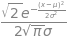

In [220]:
f(x)

In [230]:
(f(x)
.integrate((x,-sm.oo, z))
).simplify()

In [221]:

(f(x)
.integrate((x,-sm.oo, sm.oo))
).simplify()

In [222]:
((x * f(x))
.integrate((x,-sm.oo, sm.oo))
).simplify()

In [224]:
((x**2 * f(x))
.integrate((x,-sm.oo, sm.oo))
).simplify()

In [225]:
(((x-μ)**2 * f(x))
.integrate((x,-sm.oo, sm.oo))
).simplify()

In [226]:
((x**3 * f(x))
.integrate((x,-sm.oo, sm.oo))
).simplify()

In [227]:
((x**4 * f(x))
.integrate((x,-sm.oo, sm.oo))
).simplify()

In [229]:
((x**10 * f(x))
.integrate((x,-sm.oo, sm.oo))
).simplify()

# sympy.stats
- https://docs.sympy.org/latest/modules/stats.html

In [231]:
from sympy.stats import DiscreteUniform, density


In [232]:
import sympy.stats as smst


In [236]:
X= smst.Normal('X',μ,σ)
X

In [240]:
f= smst.density(X)
f

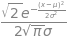

In [244]:
f(x)

In [247]:
F= smst.cdf(X)
F(x)

In [249]:
F(x).diff(x) == f(x)

True

In [259]:
f(t).integrate((t,-sm.oo,x)
) == F(x)

True

# Binomial distribution

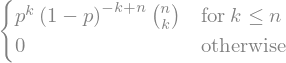

In [35]:
from ryPat import *
import sympy.stats as smst

x, k, n= sm.symbols('x, k, n', integer= True, negative= False)
p= sm.symbols('p', negative= False)

X= smst.Binomial('X', n, p)
f= smst.density(X)

f(k)

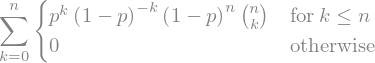

In [36]:
sm.Sum(f(k),(k,0,n)).simplify()

In [37]:
X= smst.Binomial('X', 10, .5)
X

In [49]:
f= smst.density(X)
f

In [54]:
sm.binomial

Init signature: sm.binomial(n, k)
Docstring:     
Implementation of the binomial coefficient. It can be defined
in two ways depending on its desired interpretation:

.. math:: \binom{n}{k} = \frac{n!}{k!(n-k)!}\ \text{or}\
            \binom{n}{k} = \frac{ff(n, k)}{k!}

First, in a strict combinatorial sense it defines the
number of ways we can choose `k` elements from a set of
`n` elements. In this case both arguments are nonnegative
integers and binomial is computed using an efficient
algorithm based on prime factorization.

The other definition is generalization for arbitrary `n`,
however `k` must also be nonnegative. This case is very
useful when evaluating summations.

For the sake of convenience for negative integer `k` this function
will return zero no matter what valued is the other argument.

To expand the binomial when `n` is a symbol, use either
``expand_func()`` or ``expand(func=True)``. The former will keep
the polynomial in factored form while the latter will expand the
p

In [330]:
dx

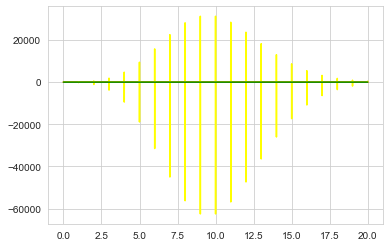

In [392]:
import scipy.stats as st

x=  np.linspace(0,20,10001)
dx= x[1]-x[0]


f= lambda x:st.binom.pmf(x, n=100, p=.1)
f= lambda x:st.poisson.pmf(x, mu= 10)
#f= lambda x:st.norm.pdf(x, loc=10, scale=1)

f= f(x)

f1= np.diff(f)/dx
f2= np.diff(f1)/dx

F=  np.cumsum(f)*dx

pl.plot(x,f,
        x[:-1], f1,
        x[:-2], f2,
        x,F
       )